## Introduction to NumPy

  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

In [1]:
import numpy as np
np.__version__

'1.14.2'

## Where to get help

- http://docs.scipy.org
- Forums: mailing list, http://stackoverflow.com

## Where do I learn more?

- <a href="http://mentat.za.net/numpy/intro/intro.html">NumPy introductory tutorial</a>
- <a href="http://scipy-lectures.github.com">SciPy Lectures</a>

## Familiarize yourself with the notebook environment

- Tab completion
- Docstring inspection
- Magic commands: %timeit, %run
- Two modes: navigate & edit (use the keyboard!)

## NumPy vs pure Python—a speed comparison

In [2]:
x = np.random.random(1024)

%timeit [t**2 for t in x]

314 µs ± 4.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
%timeit x**2

1.45 µs ± 17.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


<img src="array_vs_list.png" width="60%"/>

From: Python Data Science Handbook by Jake VanderPlas (https://github.com/jakevdp/PythonDataScienceHandbook), licensed CC-BY-NC-ND

## The structure of a NumPy array

<img src="ndarray_struct.png"/>

In [4]:
x = np.array([[1, 4], [2, 8]], dtype=np.uint8)
x

array([[1, 4],
       [2, 8]], dtype=uint8)

In [6]:
x.shape, x.dtype, x.strides, x.size, x.ctypes.data

((2, 2), dtype('uint8'), (2, 1), 4, 36824544)

In [11]:
def memory_at(arr):
    import ctypes
    return list(ctypes.string_at(arr.ctypes.data, arr.size * arr.itemsize))

In [12]:
memory_at(x)

[1, 4, 2, 8]

In [14]:
y = x.T
y.shape, y.dtype, y.strides, y.size, y.ctypes.data

((2, 2), dtype('uint8'), (1, 2), 4, 36824544)

In [15]:
memory_at(y)

[1, 4, 2, 8]

## Constructing arrays

In [16]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [17]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

In [18]:
np.array([[1, 2], [-1, 5]])

array([[ 1,  2],
       [-1,  5]])

In [19]:
np.zeros_like(x)

array([[0, 0],
       [0, 0]], dtype=uint8)

In [20]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [21]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
rng = np.random.RandomState(42)

rng.random_sample((3, 3))

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501]])

In [6]:
x = rng.random_sample((2,2,3,2,2))

In [7]:
x.shape

(2, 2, 3, 2, 2)

## Shape

In [29]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [30]:
x.reshape((3, 4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## Indexing

In [31]:
x = np.array([[1, 2, 3], [3, 2, 1]])
x

array([[1, 2, 3],
       [3, 2, 1]])

In [32]:
x[0, 1]

2

In [33]:
x[1]

array([3, 2, 1])

In [34]:
x[:, 1:3]

array([[2, 3],
       [2, 1]])

### Fancy indexing—indexing with arrays

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

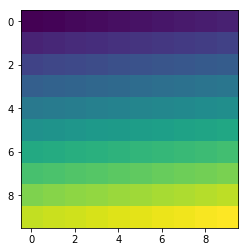

In [9]:
x = np.arange(100).reshape((10, 10))
plt.imshow(x);

In [10]:
mask = (x < 50)
mask[:5, :5]

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [11]:
mask.shape

(10, 10)

In [12]:
x[mask]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

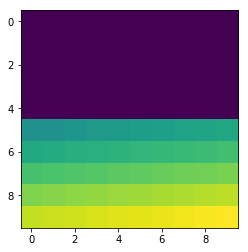

In [13]:
x[mask] = 0
plt.imshow(x);

### Views

In [14]:
x = np.arange(10)
y = x[0:3]

print(x, y)

[0 1 2 3 4 5 6 7 8 9] [0 1 2]


In [15]:
y.fill(8)

In [16]:
print(x, y)

[8 8 8 3 4 5 6 7 8 9] [8 8 8]


## Data types

In [17]:
x = np.array([1,2,3])
x.dtype

dtype('int64')

In [53]:
x = np.array([1.5, 2, 3])
x.dtype

dtype('float64')

In [55]:
x = np.array([1, 2, 3], dtype=float)
x.dtype

dtype('float64')

## Broadcasting


### 1D

<img src="broadcast_scalar.svg" width="50%"/>

### 2D

<img src="broadcast_2D.png"/>

### 3D (showing sum of 3 arrays)

<img src="broadcast_3D.png"/>

In [18]:
x, y = np.ogrid[:5:0.5, :5:0.5]

print(x.shape)
print(y.shape)

(10, 1)
(1, 10)


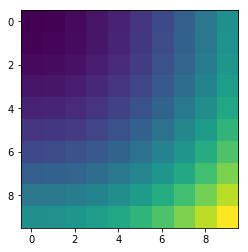

In [21]:
plt.imshow(x**2 + y**2);

## Expressions and universal functions

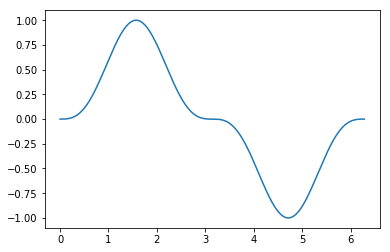

In [22]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x) ** 3

plt.plot(x, y);

(2, 2) (100, 2)
(2, 2) (2, 100)


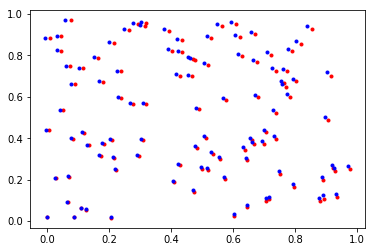

In [23]:
θ = np.deg2rad(1)
cos = np.cos
sin = np.sin

R = np.array([[cos(θ), -sin(θ)],
              [sin(θ),  cos(θ)]])

v = np.random.random((100, 2))

print(R.shape, v.shape)
print(R.shape, v.T.shape)

v_ = (R @ v.T).T

plt.plot(v[:, 0], v[:, 1], 'r.')
plt.plot(v_[:, 0], v_[:, 1], 'b.');

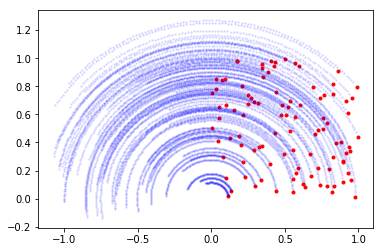

In [24]:
v = np.random.random((100, 2))
plt.plot(v[:, 0], v[:, 1], 'r.')
v_ = (R @ v.T).T

for i in range(100):
    v_ = (R @ v_.T).T
    plt.plot(v_[:, 0], v_[:, 1], 'b.', markersize=3, alpha=0.1)

## Input/output

In [93]:
!cat hand.txt

1.645161290322580516e+00 1.161458333333333259e+00
1.645161290322580516e+00 1.593750000000000000e+00
1.350806451612903025e+00 1.921875000000000000e+00
1.375000000000000000e+00 2.182291666666666519e+00
1.685483870967741993e+00 1.937500000000000000e+00
1.608870967741935498e+00 2.552083333333333037e+00
1.685483870967741993e+00 2.697916666666666519e+00
1.762096774193548487e+00 2.567708333333333037e+00
1.830645161290322509e+00 1.973958333333333259e+00
1.895161290322580516e+00 2.750000000000000000e+00
1.951612903225806495e+00 2.848958333333333037e+00
2.012096774193548487e+00 2.760416666666666519e+00
1.991935483870967527e+00 1.994791666666666519e+00
2.112903225806451513e+00 2.630208333333333037e+00
2.201612903225806495e+00 2.734375000000000000e+00
2.254032258064516014e+00 2.604166666666666519e+00
2.149193548387096531e+00 1.953125000000000000e+00
2.306451612903225534e+00 2.369791666666666519e+00
2.391129032258064502e+00 2.369791666666666519e+00
2.415322580645161032e+00 2.187500000000000000e+00


In [25]:
hand = np.loadtxt('hand.txt')
hand[:5]

array([[1.64516129, 1.16145833],
       [1.64516129, 1.59375   ],
       [1.35080645, 1.921875  ],
       [1.375     , 2.18229167],
       [1.68548387, 1.9375    ]])

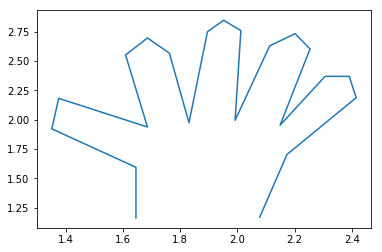

In [26]:
plt.plot(hand[:, 0], hand[:, 1]);

In [36]:
# Use the NumPy binary format--do not pickle!
# np.save and np.savez

## Reductions

In [118]:
a = np.arange(12).reshape((3, 4))

In [119]:
a.mean(axis=0)

array([4., 5., 6., 7.])

In [120]:
a.sum()

66

In [121]:
x = np.array([1 + 1j, 2 + 2j])

In [122]:
x.real

array([1., 2.])

In [123]:
y = np.array([-0.1, -0.05, 0.35, 0.5, 0.9, 1.1])

In [124]:
y.clip(0, 0.5)

array([0.  , 0.  , 0.35, 0.5 , 0.5 , 0.5 ])

## Exercises

Try the three exercises at http://www.scipy-lectures.org/intro/numpy/exercises.html#array-manipulations

## Structured arrays

In [97]:
!cat rainfall.txt

AAEF 1980 0.1 0.3 1.1 0.4 3.1 1.8 8.6 3.4 1.2 3.3 9.5 1.2
CABF 1981 3.1 3.3 3.2 3.5 3.1 1.2 2.3 2.8 2.0 1.1 1.2 3.4
BDII 1990 0.0 0.0 0.1 0.0 0.2 0.3 0.4 0.6 0.8 0.9 10.0 0.0
IPLS 2010 5.1 5.2 5.1 5.6 5.7 5.1 5.0 4.8 4.3 4.4 4.6 4.1



In [98]:
dt = np.dtype([('station', 'S4'), ('year', int), ('level', (float, 12))])

In [99]:
x = np.zeros((3,), dtype=dt)
x

array([(b'', 0, [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
       (b'', 0, [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
       (b'', 0, [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
      dtype=[('station', 'S4'), ('year', '<i8'), ('level', '<f8', (12,))])

In [100]:
r = np.loadtxt('rainfall.txt', dtype=dt)

In [101]:
r['station']

array([b'AAEF', b'CABF', b'BDII', b'IPLS'], dtype='|S4')

In [103]:
mask = (r['station'] == b'AAEF')
r[mask]

array([(b'AAEF', 1980, [0.1, 0.3, 1.1, 0.4, 3.1, 1.8, 8.6, 3.4, 1.2, 3.3, 9.5, 1.2])],
      dtype=[('station', 'S4'), ('year', '<i8'), ('level', '<f8', (12,))])

In [104]:
r[mask]['level']

array([[0.1, 0.3, 1.1, 0.4, 3.1, 1.8, 8.6, 3.4, 1.2, 3.3, 9.5, 1.2]])

If you're heading in this direction, you may want to involve Pandas:

In [106]:
import pandas as pd
df = pd.read_csv('rainfall.txt', header=None, sep=' ',
                 names=('station', 'year',
                        'jan', 'feb', 'mar', 'apr', 'may', 'jun',
                        'jul', 'aug', 'sep', 'oct', 'nov', 'dec'))
df

,station,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,AAEF,1980,0.1,0.3,1.1,0.4,3.1,1.8,8.6,3.4,1.2,3.3,9.5,1.2
1,CABF,1981,3.1,3.3,3.2,3.5,3.1,1.2,2.3,2.8,2.0,1.1,1.2,3.4
2,BDII,1990,0.0,0.0,0.1,0.0,0.2,0.3,0.4,0.6,0.8,0.9,10.0,0.0
3,IPLS,2010,5.1,5.2,5.1,5.6,5.7,5.1,5.0,4.8,4.3,4.4,4.6,4.1


In [107]:
df['station']

0    AAEF
1    CABF
2    BDII
3    IPLS
Name: station, dtype: object

In [111]:
aaef_data = df[df['station'] == 'AAEF']
aaef_data

,station,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,AAEF,1980,0.1,0.3,1.1,0.4,3.1,1.8,8.6,3.4,1.2,3.3,9.5,1.2


In [116]:
aaef_data.loc[:, 'jan':'dec']

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0.1,0.3,1.1,0.4,3.1,1.8,8.6,3.4,1.2,3.3,9.5,1.2


If you look at the DataFrame values, what do you see? A structured array!

In [117]:
aaef_data.values

array([['AAEF', 1980, 0.1, 0.3, 1.1, 0.4, 3.1, 1.8, 8.6, 3.4, 1.2, 3.3,
        9.5, 1.2]], dtype=object)

Pandas makes some things a lot easier, but it's API and underlying model is
much more complex than NumPy's, so YMMV.